# Trabajo Práctico N° 1: Árboles de Decisión



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf.fit(X_train, y_train)
# tree.plot_tree(clf)
print(X_train[0])
print(y_train[0])
clf.predict([[5.9, 3,  4.2, 1.5]])

[5.9 3.  4.2 1.5]
1


array([1])

## Ejercicio 1

Genere tres conjuntos de datos de entrenamiento correspondientes al problema de las espirales anidadas de la práctica 0, uno de longitud 150, otro de 600 y un tercero de 3000. Genere un conjunto de test de longitud 10000. A partir de cada uno de los conjuntos de entrenamiento, entrene el árbol de decisión correspondiente y grafique las predicciones sobre el conjunto de test. Comente los resultados.

<AxesSubplot:title={'center':'Train Set Size: 3000'}, xlabel='x', ylabel='y'>

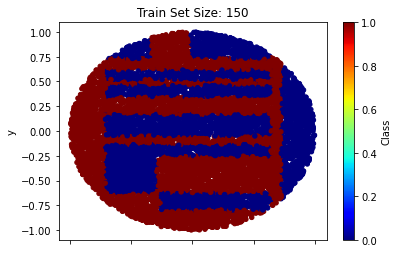

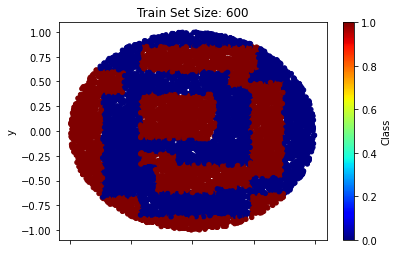

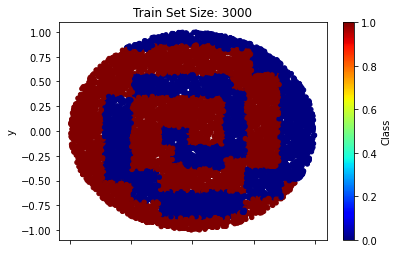

In [30]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

# La función que genera puntos para el problema de las espirales anidadas.

# Las funciones que representan nuestras curvas
def curve1(theta):
    return theta / (4 * math.pi)

def curve2(theta):
    return (theta + math.pi) / (4 * math.pi)

def generate_points_c(n):
    
    len0 = n // 2
    len1 = n - len0

    class0 = 0
    class1 = 0

    # Radio y centro del circulo
    radius = 1
    x, y = (0, 0)

    # Guardamos las coordenadas x e y respectivamente
    xs = []
    ys = []

    clases = []
    # Tamaño random de puntos a generar
    # for i in range(0, n):
    while (class0 < len0) or (class1 < len1):
    # random.random() devuelve numeros entre 0.0 y 1.0
        theta = 2 * math.pi * random.random()
        r = radius * math.sqrt(random.random())

        # clase = 0
        # Sumando de a 0.5 vamos dando vuelta alrededor de todo el espiral (esto 
        # se puede ver analizando una gráfica de la curva1) y vemos 
        # si el radio cae en alguna de las franjas correctas, y de ser así
        # le asignamos la clase 1 a ese punto, en caso contrario esta permanecerá
        # en 0.
        flag = False
        for theta0 in [theta + (2 * math.pi * i) for i in range(-1, 6)]:
            if (curve1(theta0) < r and r < curve2(theta0)):
                if class1 < len1:
                    class1 += 1
                    # Convertimos las coordenadas polares a cartesianas y almacenamos.
                    xs.append(r * math.cos(theta) + x)
                    ys.append(r * math.sin(theta) + y)
                    # Guadamos la clase correspondiente al punto generado.
                    clases.append(1)
                flag = True
                continue
        if class0 < len0 and not flag:
            class0 += 1
            # Convertimos las coordenadas polares a cartesianas y almacenamos.
            xs.append(r * math.cos(theta) + x)
            ys.append(r * math.sin(theta) + y)
            # Guadamos la clase correspondiente al punto generado.
            clases.append(0)

    # Generamos el dataframe
    points = {'x': xs, 'y': ys, 'Class': clases}
    df = pd.DataFrame(points)
    return df

# Ahora generamos conjuntos de entrenamiento de longitud 150, 600 y 3000

train_150 = generate_points_c(150)
train_600 = generate_points_c(600)
train_3000 = generate_points_c(3000)

Xtrain_150, ytrain150 = train_150.loc[ : , ['x', 'y'] ], train_150.loc[:, 'Class']
Xtrain_600, ytrain600 = train_600.loc[ : , ['x', 'y'] ], train_600.loc[:, 'Class']
Xtrain_3000, ytrain3000 = train_3000.loc[ : , ['x', 'y'] ], train_3000.loc[:, 'Class']

test_set = generate_points_c(10000)

clf150 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf600 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf3000 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)

# Entrenamos y observamos los datos para el conjunto de testeo de 150
clf150.fit(Xtrain_150, ytrain150)
p150 = clf150.predict(test_set.loc[ : , ['x', 'y'] ])
df150 = test_set.loc[ : , ['x', 'y'] ]
df150['Class'] = p150
df150.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet', title="Train Set Size: 150")

# Entrenamos y observamos los datos para el conjunto de testeo de 600
clf600.fit(Xtrain_600, ytrain600)
p600 = clf600.predict(test_set.loc[ : , ['x', 'y'] ])
df600 = test_set.loc[ : , ['x', 'y'] ]
df600['Class'] = p600
df600.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet', title="Train Set Size: 600")

# Entrenamos y observamos los datos para el conjunto de testeo de 3000
clf3000.fit(Xtrain_3000, ytrain3000)
p3000 = clf3000.predict(test_set.loc[ : , ['x', 'y'] ])
df3000 = test_set.loc[ : , ['x', 'y'] ]
df3000['Class'] = p3000
df3000.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet', title="Train Set Size: 3000")


Recordemos que la figura original de nuestro TP anterior era la siguiente

<AxesSubplot:xlabel='x', ylabel='y'>

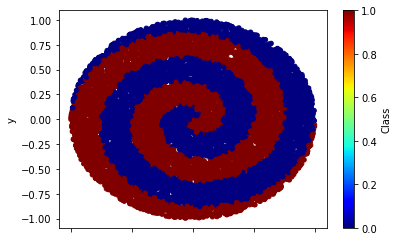

In [32]:
df = generate_points_c(10000)
df.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet')

Para el conjunto de datos de tamaño 150 la figura generada prácticamente no se asemeja, mientras que para los conjuntos de tamaño 600 y 3000 se logra ver un acercamiento al parecido de la figura original. 

Claramente, la conclusión que podemos obtener de aquí es que nuestro modelo necesita una cantidad considerable de datos de entrenamiento para poder lograr una mejor predicción con el conjunto de testeo.

## Ejercicio 2

Dependencia con la longitud del conjunto de entrenamiento - Sobreajuste:

Genere datasets usando el código desarrollado en el punto a) de la práctica 0 (vamos a llamar a estos datos "diagonal", y a los descriptos en el punto b) "paralelo"), con C = 0.78 y d = 2. Genere un único conjunto de test con n = 10000. Genere 20 conjuntos de entrenamiento para cada uno de los siguientes valores de n: 125, 250, 500, 1000, 2000, 4000. Entrene árboles sobre estos conjuntos y guarde los resultados de error (1-accuracy) sobre los datos de entrenamiento y sobre el conjunto de test, como así también el tamaño del árbol (atributo tree_.node_count). En primer lugar genera una gráfica de las predicciones sobre los datos de test (plot x-y con colores para las clases) para un ejemplo de cada tamaño de conjunto de entrenamiento. Comente lo que se puede observar.
También genere dos gráficas: la primer gráfica tiene el training error y test error, y la segunda la cantidad de nodos en el árbol, todos como función de la longitud del conjunto de entrenamiento (utilice siempre el promedio de los 20 conjuntos de cada longitud dada). Sugerencia: usar escala logarítmica en el eje x, de la cantidad de datos.

Finalmente, repita todo el procedimiento completo usando como generador de datos el "paralelo". Incluya los resultados correspondientes en las mismas gráficas del diagonal. Discuta los resultados.

In [ ]:
# Generamos datasets con el generador del apartado a)

import pandas as pd
import numpy as np
from math import sqrt
import math
from typing import List
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score

def generate_dataframe(d: int, n: int, deviation: float, center0: List[int], center1: List[int]):    
    m = [deviation**2] * d
    # Generamos los n/2 puntos de la clase 0
    data0 = np.random.multivariate_normal(center0, np.diag(m), n//2)  
    # Generamos los n/2 puntos de la clase 1
    data1 = np.random.multivariate_normal(center1, np.diag(m), math.ceil(n/2))  


    # Concatenamos ambos arrays, primero colocamos los puntos correspondientes a 
    # la clase 0 y luego los correspondientes a la clase 1 así luego no es más
    # fácil clasificarlos.
    data = np.concatenate((data0, data1), axis=0)

    # Generamos las columnas que representarán las coordenadas de cada punto.
    cols = list(map(str, list(range(d))))
    # Generamos el dataframe
    df = pd.DataFrame(data, columns=cols)
    # Agregamos al final del dataframe la columna que representa la clase de
    # cada punto.
    df['Class'] = ([0] * (n // 2)) + ([1] * (math.ceil(n/2)))
    
    return df

def generate_dataframe_a(d: int, n: int, C: float): 
    deviation = C * sqrt(d)
    c0 = [-1] * d
    c1 = [1] * d
    return generate_dataframe(d, n, deviation, c0, c1)

# Generamos nuestro conjunto de testeo
data = generate_dataframe_a(2, 10000, 0.78)
test_set = data.loc[ : , ['0', '1'] ]
y_test_set = data.loc[:, 'Class']

# Valores de n
n_values = [125, 250, 500, 1000, 2000, 4000]

# Para guardar la info pedida en el enunciado
nn = []
train_errors = []
test_errors = []
# errors = []
tree_sizes = []
# Guardamos un ejemplo de predicción de cada tamaño de n para luego graficarlo
predictions = {}

# Generamos los 20 conjuntos de entrenamiento para cada n y guardamos la información
# pedida en el ejercicio para analizarla despues

for n in n_values:
    for i in range(0, 20):
        nn.append(n)
        # Generamos el conjunto de entrenamiento
        train_set = generate_dataframe_a(2, n, 0.78)
        Xtrain, ytrain = train_set.loc[ : , ['0', '1'] ], train_set.loc[:, 'Class']

        # Creamos el árbol y lo entrenamos
        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf.fit(Xtrain, ytrain)

        # Guardamos el tamaño del árbol
        tree_sizes.append(clf.tree_.node_count)

        # Predecimos sobre el conjunto de testeo
        prediction = clf.predict(test_set)

        # Guardamos el error (1 - accuracy) sobre el conjunto de entrenamiento 
        # y sobre el conjunto de testeo.
        test_errors.append(1 - accuracy_score(y_test_set, prediction))
        train_errors.append(1 - accuracy_score(ytrain, clf.predict(Xtrain)))

        # Si no tenemos un ejemplo de predicciones de este tamaño lo guardamos
        # para poder analizarlo luego.

        if n not in predictions.keys():
            predictions[n] = (test_set, prediction)

# Graficamos un conjunto de cada tamaño con su respectiva predicción
for size in predictions.keys():
    test_set, prediction = predictions[size]
    df_pred = test_set
    df_pred['Class'] = prediction
    df_pred.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet', title=f"Size: {size}")

Arriba podemos ver las gráficas de los resultados sobre el conjunto de testeo para los conjuntos de entrenamiento de tamaño 125, 250, 500, 1000, 2000 y 4000 respectivamente.

Podemos ver que a medida que aumenta el tamaño del conjunto de entrenamiento, la disposición de los puntos mejora aunque ligeramente.

En el ejercicio anterior, la mejora era significativa con respecto a los tamaños del conjunto de entrenamiento, pero en este caso no hay una diferencia muy grande entre los distintos tamaños, incluso corriendo la celda de código de arriba podemos ver que el conjunto de entrenamiento de tamaño 125 puede llegar a lograr una muy buena disposición de los puntos considerando que el tamaño del conjunto de entrenamiento es 'chico'.

In [20]:
# Gráfica de training error y test error

df = pd.DataFrame({})
df['N'] = nn
df['Nodes'] = tree_sizes
df['TrError'] = train_errors
df['TeError'] = test_errors

mean_train_error = df.groupby('N')['TrError'].mean().to_numpy()
mean_test_error = df.groupby('N')['TeError'].mean().to_numpy()

error_df = pd.DataFrame({})
error_df['Nodes'] = n_values
error_df['TrError'] = mean_train_error
error_df['TeError'] = mean_test_error
error_df.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet')

array([0.0696   , 0.0722   , 0.0788   , 0.0921   , 0.097975 , 0.1022625])

comentario sobre la grafica de traning y test

<AxesSubplot:xlabel='N', ylabel='Nodes'>

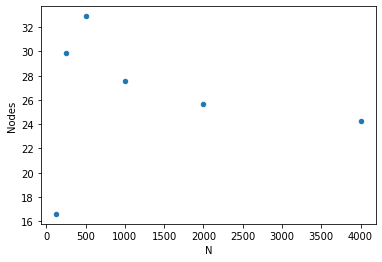

In [18]:
# Gráfica de la cantidad de nodos del árbol en función de la longitud del conjunto de entrenamiento

df = pd.DataFrame({})
df['N'] = nn
df['Nodes'] = tree_sizes
df['TrError'] = train_errors
df['TeError'] = test_errors

# Calculamos el promedio de cantidad de nodos de acuerdo a cada tamaño de conjunto
mean_node_size = df.groupby('N')['Nodes'].mean().to_numpy()
# Creamos el dataframe con los datos 'acomodados' para poder hacer el gráfico
mean_df = pd.DataFrame({})
mean_df['N'] = n_values
mean_df['Nodes'] = mean_node_size
mean_df.plot(x=0, y=1, kind='scatter', colormap='jet')
